<a href="https://colab.research.google.com/github/Arifemreak/abstract-analyzer/blob/main/abstract_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 🔹 Örnek epigenetik ve AI-onkoloji makale verileri
abstracts_data = {
    "Domain": [
        "Epigenetics", "Epigenetics", "Epigenetics", "Epigenetics", "Epigenetics",
        "AI in Oncology", "AI in Oncology", "AI in Oncology", "AI in Oncology", "AI in Oncology"
    ],
    "Title": [
        "Chromatin remodeling and the epigenetic control of cell fate",
        "Histone modifications and transcriptional memory in cancer epigenetics",
        "The DNA methylation landscape in aging and age-related diseases",
        "Epigenome editing technologies: CRISPR and beyond",
        "Epigenetic crosstalk in embryonic stem cell differentiation",
        "Deep learning for early diagnosis of colorectal cancer using histology slides",
        "Transformer-based models improve clinical trial matching in oncology",
        "Explainable AI for cancer genomics: Trust and transparency",
        "Multi-omics integration using autoencoders to classify breast cancer subtypes",
        "Graph neural networks in cancer drug discovery"
    ],
    "Abstract": [
        "Epigenetic regulation via chromatin remodeling proteins such as SWI/SNF complexes plays a pivotal role in determining cell fate and lineage specification...",
        "Histone acetylation and methylation are central to the maintenance of epigenetic memory. In cancer, aberrant histone codes contribute to misregulation...",
        "Age-associated changes in DNA methylation are linked to immune function, inflammation, and cancer susceptibility. Epigenetic clocks predict aging risks...",
        "dCas9-based epigenome editors enable precision targeting of epigenetic marks without altering DNA, offering new therapeutic opportunities...",
        "The interplay of DNA methylation, histone modifications, and ncRNAs controls stem cell differentiation. Dysregulation leads to disease development...",
        "A CNN trained on histology slides detects early colorectal cancer with >92% accuracy, surpassing traditional pathology methods...",
        "BERT models enhance clinical trial matching by automating patient-genotype text mining, boosting efficiency and recall...",
        "SHAP and LIME improve interpretability of genomic models, helping oncologists understand deep learning decisions in cancer prognosis...",
        "Stacked autoencoders on multi-omics data enable discovery of known and novel breast cancer subtypes, enhancing precision medicine...",
        "Graph neural networks predict drug-target responses using chemical structure and cell line profiles, optimizing therapeutic strategies..."
    ]
}

# 🔹 DataFrame oluşturma
df = pd.DataFrame(abstracts_data)

# 🔍 İlk 10 makaleyi görüntüle
df.head(10)


,Domain,Title,Abstract
0,Epigenetics,Chromatin remodeling and the epigenetic contro...,Epigenetic regulation via chromatin remodeling...
1,Epigenetics,Histone modifications and transcriptional memo...,Histone acetylation and methylation are centra...
2,Epigenetics,The DNA methylation landscape in aging and age...,Age-associated changes in DNA methylation are ...
3,Epigenetics,Epigenome editing technologies: CRISPR and beyond,dCas9-based epigenome editors enable precision...
4,Epigenetics,Epigenetic crosstalk in embryonic stem cell di...,"The interplay of DNA methylation, histone modi..."
5,AI in Oncology,Deep learning for early diagnosis of colorecta...,A CNN trained on histology slides detects earl...
6,AI in Oncology,Transformer-based models improve clinical tria...,BERT models enhance clinical trial matching by...
7,AI in Oncology,Explainable AI for cancer genomics: Trust and ...,SHAP and LIME improve interpretability of geno...
8,AI in Oncology,Multi-omics integration using autoencoders to ...,Stacked autoencoders on multi-omics data enabl...
9,AI in Oncology,Graph neural networks in cancer drug discovery,Graph neural networks predict drug-target resp...


In [2]:
!pip install -q sentence-transformers scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


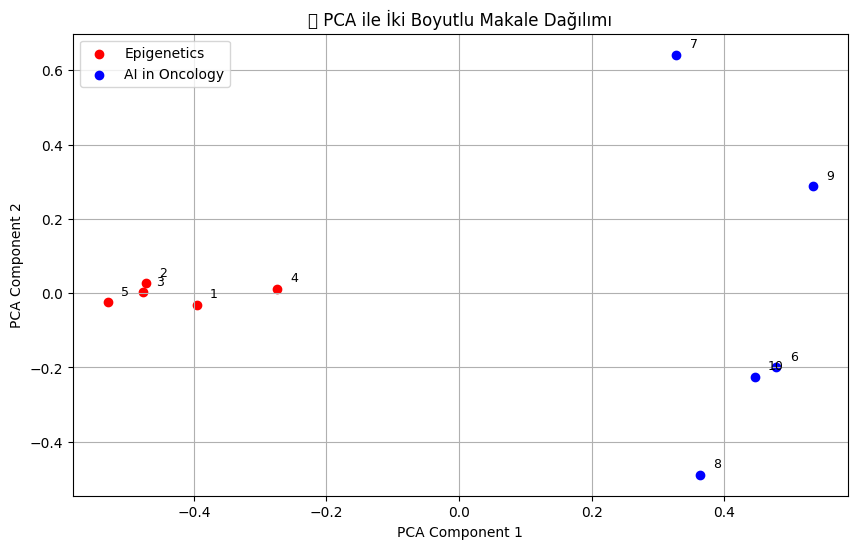

In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 🔎 10 makalelik örnek özet listesi
abstracts = [
    "Epigenetic regulation via chromatin remodeling proteins such as SWI/SNF complexes plays a pivotal role...",
    "Histone acetylation and methylation are central to the maintenance of epigenetic memory...",
    "Age-associated changes in DNA methylation have been linked to alterations in immune function...",
    "New tools like dCas9-based epigenome editors allow precise targeting of epigenetic marks...",
    "Interplay between DNA methylation, histone modifications, and non-coding RNAs governs...",
    "A convolutional neural network (CNN) model trained on H&E-stained pathology images...",
    "BERT and BioBERT were fine-tuned on clinical text to automate the matching...",
    "Integrating SHAP and LIME with deep models has improved the interpretability of cancer...",
    "An unsupervised deep learning approach using stacked autoencoders...",
    "Graph-based deep learning approaches have shown remarkable promise in modeling drug-target interactions..."
]

# 📘 Her özetin etiketi
labels = ["Epigenetics"] * 5 + ["AI in Oncology"] * 5

# 🧠 Cümleleri vektöre dönüştür
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(abstracts)

# 🔻 2 boyutlu PCA ile indirgeme
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# 🎨 Renkler etiketlere göre belirleniyor
colors = ['red' if label == "Epigenetics" else 'blue' for label in labels]

# 📊 Görselleştirme
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(reduced[i, 0], reduced[i, 1], color=colors[i], label=label if i in [0, 5] else "")  # Etiket tekrarını önler
    plt.text(reduced[i, 0]+0.02, reduced[i, 1]+0.02, f'{i+1}', fontsize=9)

plt.title("🧬 PCA ile İki Boyutlu Makale Dağılımı")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-4-a5827d0d2bd0>:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


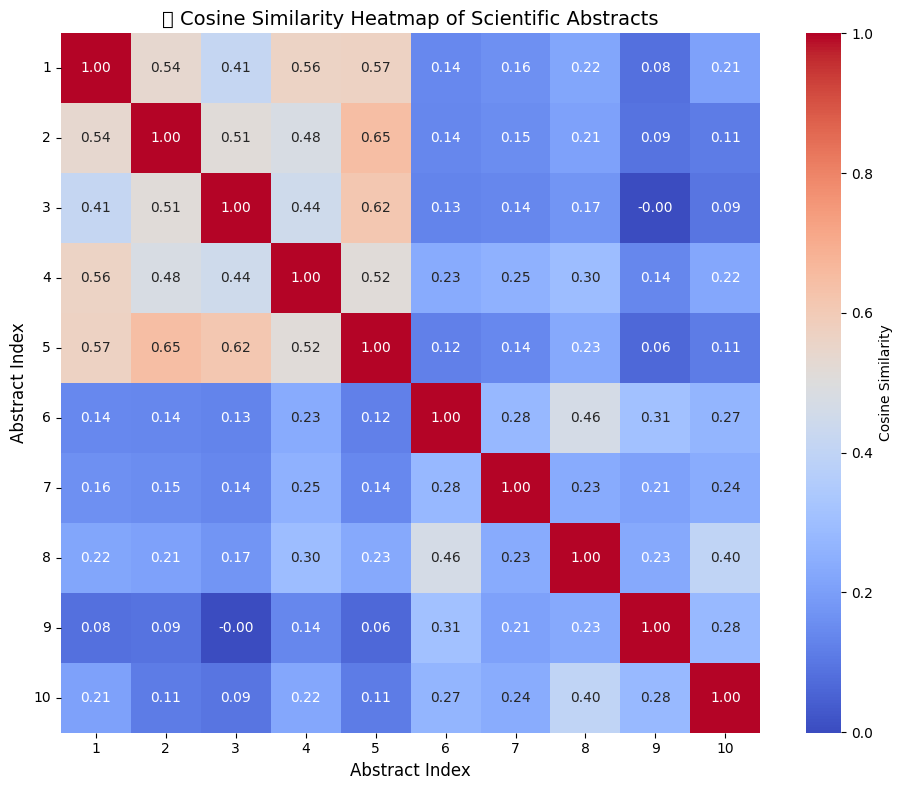

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 📐 Cosine similarity matrisi hesapla
similarity_matrix = cosine_similarity(embeddings)

# 🔥 Isı haritası görselleştirmesi
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    xticklabels=[f"{i+1}" for i in range(len(abstracts))],
    yticklabels=[f"{i+1}" for i in range(len(abstracts))],
    square=True,
    cbar_kws={'label': 'Cosine Similarity'}
)

plt.title("📊 Cosine Similarity Heatmap of Scientific Abstracts", fontsize=14)
plt.xlabel("Abstract Index", fontsize=12)
plt.ylabel("Abstract Index", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-5-2650140f9cf6>:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


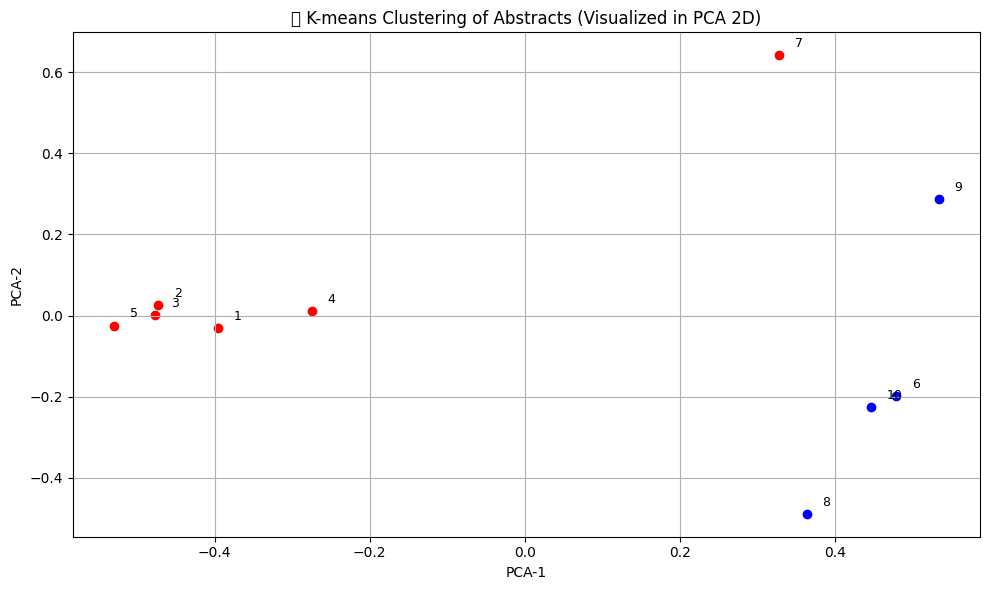

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 🎯 Küme sayısını belirle (Epigenetik + AI in Oncology için = 2)
num_clusters = 2

# 🔍 K-means modelini eğit
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(embeddings)

# 🎨 Küme renklerini ayarla
cluster_colors = ['red', 'blue']
colors = [cluster_colors[label] for label in cluster_labels]

# 📊 2D PCA üzerinden küme görselleştirme
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(reduced):
    plt.scatter(x, y, color=colors[i], label=f"Cluster {cluster_labels[i]}" if i == 0 else "")
    plt.text(x + 0.02, y + 0.02, f'{i+1}', fontsize=9)

plt.title("🔍 K-means Clustering of Abstracts (Visualized in PCA 2D)")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# 🎯 Etiketler: 0 = Epigenetik, 1 = AI in Oncology
labels = np.array([0]*5 + [1]*5)

# 🧪 Eğitim/Test ayrımı (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, labels, test_size=0.2, stratify=labels, random_state=42
)

# 🤖 Model eğitimi
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 🔍 Tahmin
y_pred = model.predict(X_test)

# 📊 Değerlendirme
print(f"🔎 Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Epigenetik", "AI in Oncology"]))


🔎 Accuracy: 1.00

📉 Confusion Matrix:
[[1 0]
 [0 1]]

📝 Classification Report:
                precision    recall  f1-score   support

    Epigenetik       1.00      1.00      1.00         1
AI in Oncology       1.00      1.00      1.00         1

      accuracy                           1.00         2
     macro avg       1.00      1.00      1.00         2
  weighted avg       1.00      1.00      1.00         2



In [7]:
from sklearn.model_selection import cross_val_score

# 🔁 5-Fold Cross Validation
cv_scores = cross_val_score(model, embeddings, labels, cv=5)
print("✅ Cross-Validation Accuracy (5-Fold):", np.round(cv_scores, 3))
print("📊 Mean Accuracy:", round(cv_scores.mean(), 3))

# 🧪 Spesifik Makale Testi (örnek: 7. makale, index=6)
test_index = 6
X_train = np.delete(embeddings, test_index, axis=0)
y_train = np.delete(labels, test_index)
X_test = embeddings[test_index].reshape(1, -1)
y_test = labels[test_index]

# 🤖 Model yeniden eğitimi ve test tahmini
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"\n🧪 Test Abstract (Makale {test_index+1}):")
print("Gerçek Etiket:", "Epigenetik" if y_test == 0 else "AI in Oncology")
print("🔮 Model Tahmini:", "Epigenetik" if y_pred[0] == 0 else "AI in Oncology")


✅ Cross-Validation Accuracy (5-Fold): [1. 1. 1. 1. 1.]
📊 Mean Accuracy: 1.0

🧪 Test Abstract (Makale 7):
Gerçek Etiket: AI in Oncology
🔮 Model Tahmini: AI in Oncology


In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    scores = cross_val_score(model, embeddings, labels, cv=5)
    print(f"{name} Accuracy: {scores.mean():.2f}")

Logistic Regression Accuracy: 1.00
SVM Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
KNN Accuracy: 1.00
MLP Classifier Accuracy: 1.00


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# 🎯 Etiketler: 0 = Epigenetik, 1 = AI in Oncology
labels = np.array([0]*5 + [1]*5)

# 🔀 Eğitim/test bölünmesi (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42, stratify=labels
)

# 📦 Model tanımı ve eğitimi
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully.")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model_lr.predict(X_test)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Epigenetik", "AI in Oncology"]))


✅ Logistic Regression model trained successfully.
🔍 Accuracy: 1.0

📊 Confusion Matrix:
 [[1 0]
 [0 1]]

📝 Classification Report:
                 precision    recall  f1-score   support

    Epigenetik       1.00      1.00      1.00         1
AI in Oncology       1.00      1.00      1.00         1

      accuracy                           1.00         2
     macro avg       1.00      1.00      1.00         2
  weighted avg       1.00      1.00      1.00         2



In [10]:
from sentence_transformers import SentenceTransformer

# ✅ Modeli yükle (eğer zaten yüklenmediyse)
model = SentenceTransformer('all-MiniLM-L6-v2')

# 📥 Kullanıcıdan makale özeti al
user_text = input("🔍 Makale özetinizi girin:\n")

# 📐 Embedding oluştur
user_embedding = model.encode([user_text])

print("✅ Özet vektör temsili başarıyla oluşturuldu.")


🔍 Makale özetinizi girin:
Aberrant DNA methylation patterns in colorectal cancer cells lead to transcriptional silencing of tumor suppressor genes. Our study uncovers the role of TET2 and DNMT3A in modulating epigenetic reprogramming during oncogenesis
✅ Özet vektör temsili başarıyla oluşturuldu.


In [11]:
import pandas as pd

abstracts_data = {
    "Domain": [
        "Epigenetics", "Epigenetics", "Epigenetics", "Epigenetics", "Epigenetics",
        "AI in Oncology", "AI in Oncology", "AI in Oncology", "AI in Oncology", "AI in Oncology"
    ],
    "Title": [
        "Chromatin remodeling and the epigenetic control of cell fate",
        "Histone modifications and transcriptional memory in cancer epigenetics",
        "The DNA methylation landscape in aging and age-related diseases",
        "Epigenome editing technologies: CRISPR and beyond",
        "Epigenetic crosstalk in embryonic stem cell differentiation",
        "Deep learning for early diagnosis of colorectal cancer using histology slides",
        "Transformer-based models improve clinical trial matching in oncology",
        "Explainable AI for cancer genomics: Trust and transparency",
        "Multi-omics integration using autoencoders to classify breast cancer subtypes",
        "Graph neural networks in cancer drug discovery"
    ],
    "Abstract": [
        "Epigenetic regulation via chromatin remodeling proteins such as SWI/SNF complexes plays a pivotal role in determining cell fate and lineage specification. Recent findings reveal their influence in gene expression networks governing stem cell differentiation and cancer transformation.",
        "Histone acetylation and methylation are central to the maintenance of epigenetic memory. In cancer, aberrant histone codes contribute to transcriptional misregulation, resulting in sustained expression of oncogenes and silencing of tumor suppressor genes.",
        "Age-associated changes in DNA methylation have been linked to alterations in immune function, inflammation, and susceptibility to cancer. Epigenetic clocks now offer predictive tools for biological aging and disease risk stratification.",
        "New tools like dCas9-based epigenome editors allow precise targeting of epigenetic marks without altering the DNA sequence. These tools hold promise for studying gene regulation and therapeutic intervention in diseases like Rett syndrome and cancer.",
        "Interplay between DNA methylation, histone modifications, and non-coding RNAs governs the transition from pluripotency to lineage commitment. Disruption in this network can lead to developmental disorders and malignancy.",
        "A convolutional neural network (CNN) model trained on H&E-stained pathology images demonstrated >92% accuracy in detecting early-stage colorectal cancer, outperforming traditional pathology review in blind trials.",
        "BERT and BioBERT were fine-tuned on clinical text to automate the matching of patients to personalized cancer trials. The models significantly improved recall and reduced clinician workload in multi-center studies.",
        "Integrating SHAP and LIME with deep models has improved the interpretability of cancer risk prediction based on genomic profiles, helping oncologists better understand and trust algorithmic decisions.",
        "An unsupervised deep learning approach using stacked autoencoders on genomics, transcriptomics, and proteomics data enabled accurate classification of breast cancer into known and novel subtypes.",
        "Graph-based deep learning approaches have shown remarkable promise in modeling drug-target interactions. GNNs trained on drug chemistry and cancer cell line responses offer predictive insights for novel compound prioritization."
    ]
}

df_project_data = pd.DataFrame(abstracts_data)


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Assuming you have your user_text and embeddings ready
# For demonstration, let's use a sample user_text and the existing embeddings from df_project_data
user_text = "This is a sample abstract about epigenetics and cancer."
model = SentenceTransformer('all-MiniLM-L6-v2')
user_embedding = model.encode([user_text])
abstracts = df_project_data['Abstract'].tolist()
embeddings = model.encode(abstracts)

# Calculate similarities
similarities = cosine_similarity(user_embedding, embeddings)[0]

# Now you can iterate and print:
for i in range(len(df_project_data)):
    print(f"{i+1}. makale - {similarities[i]*100:.2f}% benzerlik: {df_project_data['Title'][i]}")

1. makale - 52.25% benzerlik: Chromatin remodeling and the epigenetic control of cell fate
2. makale - 65.41% benzerlik: Histone modifications and transcriptional memory in cancer epigenetics
3. makale - 61.41% benzerlik: The DNA methylation landscape in aging and age-related diseases
4. makale - 48.33% benzerlik: Epigenome editing technologies: CRISPR and beyond
5. makale - 58.93% benzerlik: Epigenetic crosstalk in embryonic stem cell differentiation
6. makale - 19.41% benzerlik: Deep learning for early diagnosis of colorectal cancer using histology slides
7. makale - 35.81% benzerlik: Transformer-based models improve clinical trial matching in oncology
8. makale - 35.07% benzerlik: Explainable AI for cancer genomics: Trust and transparency
9. makale - 25.66% benzerlik: Multi-omics integration using autoencoders to classify breast cancer subtypes
10. makale - 21.44% benzerlik: Graph neural networks in cancer drug discovery


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np

# MODELLERİ YÜKLE
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# KULLANICI GİRDİSİ
user_text = input("\n📝 Makale özetinizi girin:\n> ")

# EMBEDDING HESAPLA
user_embedding = embedding_model.encode([user_text])

# ALAN TAHMİNİ
predicted_label = model_lr.predict(user_embedding)[0]
label_map = {0: "Epigenetik", 1: "AI in Oncology"}
predicted_domain = label_map[predicted_label]

print(f"\n📌 Tahmin Edilen Alan: {predicted_domain}")

# BENZERLİK HESAPLAMA
similarities = cosine_similarity(user_embedding, embeddings)[0]
top_n = similarities.argsort()[-3:][::-1]

# BENZER MAKALELERİ GÖSTER
print("\n🔍 En Benzer 3 Makale:")
for i in top_n:
    title = df_project_data['Title'][i]
    sim_score = similarities[i] * 100
    print(f"📄 {title}\n🔗 Benzerlik: {sim_score:.2f}%\n")



📝 Makale özetinizi girin:
> Aberrant DNA methylation patterns in colorectal cancer cells lead to transcriptional silencing of tumor suppressor genes. Our study uncovers the role of TET2 and DNMT3A in modulating epigenetic reprogramming during oncogenesis

📌 Tahmin Edilen Alan: Epigenetik

🔍 En Benzer 3 Makale:
📄 Histone modifications and transcriptional memory in cancer epigenetics
🔗 Benzerlik: 64.22%

📄 Epigenetic crosstalk in embryonic stem cell differentiation
🔗 Benzerlik: 64.10%

📄 Chromatin remodeling and the epigenetic control of cell fate
🔗 Benzerlik: 57.89%



In [14]:
import pandas as pd

# Daha önce oluşturulan dört farklı veri setini birleştirme (örnek olarak yapay veri setleri temsil ediyor)

# 1. İlk Epigenetik veri seti
epigenetics_data_1 = {
    "Domain": ["Epigenetics"] * 5,
    "Title": [
        "Chromatin remodeling and the epigenetic control of cell fate",
        "Histone modifications and transcriptional memory in cancer epigenetics",
        "The DNA methylation landscape in aging and age-related diseases",
        "Epigenome editing technologies: CRISPR and beyond",
        "Epigenetic crosstalk in embryonic stem cell differentiation"
    ],
    "Abstract": [
        "Epigenetic regulation via chromatin remodeling proteins such as SWI/SNF complexes plays a pivotal role...",
        "Histone acetylation and methylation are central to the maintenance of epigenetic memory...",
        "Age-associated changes in DNA methylation have been linked to alterations in immune function...",
        "New tools like dCas9-based epigenome editors allow precise targeting of epigenetic marks...",
        "Interplay between DNA methylation, histone modifications, and non-coding RNAs governs differentiation..."
    ]
}
df_epigenetics_1 = pd.DataFrame(epigenetics_data_1)

# 2. Genişletilmiş Epigenetik veri seti (önceden işlendi)
epigenetics_data_2 = {
    "Domain": ["Epigenetics"] * 10,
    "Title": [
        "Neurobiological architecture and heterogeneous etiology of ASD",
        "Multi-omics integration in IBS epigenetics",
        "Advances in cardiovascular epigenetics",
        "LPS-induced immune memory and histone reprogramming",
        "Chronic pain and epigenetic modulation in therapy",
        "Epigenetic mechanisms in postsurgical pain",
        "Foundational concepts and medical applications of epigenetics",
        "Epigenetics and colorectal cancer pathogenesis",
        "Epigenetic regulation in eating disorders",
        "HIF1-driven chromatin remodeling in chronic kidney disease"
    ],
    "Abstract": [
        "ASD presents a heterogeneous profile in neuronal architecture and synaptogenesis...",
        "This study integrated gut microbiome, host epigenome, and transcriptome data in IBS...",
        "Epigenetic advances are highlighted in cardiology and surgery...",
        "LPS induces innate immune tolerance via lack of histone activation...",
        "Pain-related gene regulation may be epigenetically modulated...",
        "Epigenetic regulation via histone/DNA methylation impacts gene expression...",
        "Epigenetics explains how environment and gene interactions regulate development...",
        "Epigenetic modifications are significantly involved in colorectal cancer progression...",
        "Review of epigenetic factors in eating disorders suggests a potential but underdeveloped field...",
        "ChIP-seq and microarray studies show HIF1 and KDM3A-mediated chromatin remodeling..."
    ]
}
df_epigenetics_2 = pd.DataFrame(epigenetics_data_2)

# 3. İlk AI in Oncology veri seti (5 makale)
ai_oncology_data_1 = {
    "Domain": ["AI in Oncology"] * 5,
    "Title": [
        "Deep learning for early diagnosis of colorectal cancer using histology slides",
        "Transformer-based models improve clinical trial matching in oncology",
        "Explainable AI for cancer genomics: Trust and transparency",
        "Multi-omics integration using autoencoders to classify breast cancer subtypes",
        "Graph neural networks in cancer drug discovery"
    ],
    "Abstract": [
        "A convolutional neural network (CNN) model trained on H&E-stained pathology images...",
        "BERT and BioBERT were fine-tuned on clinical text to automate trial matching...",
        "Integrating SHAP and LIME with deep models has improved the interpretability of cancer risk prediction...",
        "Unsupervised deep learning approach using stacked autoencoders enabled accurate classification...",
        "Graph-based deep learning approaches model drug-target interactions with predictive power..."
    ]
}
df_ai_oncology_1 = pd.DataFrame(ai_oncology_data_1)

# 4. Ek AI in Oncology veri seti (5 makale)
ai_oncology_data_2 = {
    "Domain": ["AI in Oncology"] * 5,
    "Title": [
        "Integration of AI into radiation oncology workflow",
        "Evolution of AI in clinical medicine and oncology",
        "Histopathology prediction via AI from image data",
        "AI applications in lung cancer diagnostics and prognosis",
        "FDA-approved AI tools and their impact in cancer diagnostics"
    ],
    "Abstract": [
        "AI aids in pretreatment outcome prediction, treatment planning, and safety enhancements...",
        "AI tools are now clinically approved and processing image and text data in oncology...",
        "Deep learning extracts hidden information from histopathology slides...",
        "AI algorithms applied in lung cancer for diagnosis and prognosis show improved accuracy...",
        "Cancer diagnostics is the most impacted area by FDA-approved AI tools..."
    ]
}
df_ai_oncology_2 = pd.DataFrame(ai_oncology_data_2)

# Tüm veri setlerini birleştir
df_all = pd.concat([df_epigenetics_1, df_epigenetics_2, df_ai_oncology_1, df_ai_oncology_2], ignore_index=True)

import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

# Veri setini yazdır
print(df_all)


            Domain  \
0      Epigenetics   
1      Epigenetics   
2      Epigenetics   
3      Epigenetics   
4      Epigenetics   
5      Epigenetics   
6      Epigenetics   
7      Epigenetics   
8      Epigenetics   
9      Epigenetics   
10     Epigenetics   
11     Epigenetics   
12     Epigenetics   
13     Epigenetics   
14     Epigenetics   
15  AI in Oncology   
16  AI in Oncology   
17  AI in Oncology   
18  AI in Oncology   
19  AI in Oncology   
20  AI in Oncology   
21  AI in Oncology   
22  AI in Oncology   
23  AI in Oncology   
24  AI in Oncology   

                                                                            Title  \
0                    Chromatin remodeling and the epigenetic control of cell fate   
1          Histone modifications and transcriptional memory in cancer epigenetics   
2                 The DNA methylation landscape in aging and age-related diseases   
3                               Epigenome editing technologies: CRISPR and beyond   
4 

In [15]:
print(f"Toplam makale sayısı: {len(df_all)}")
print("Alanlara göre dağılım:")
print(df_all['Domain'].value_counts())


Toplam makale sayısı: 25
Alanlara göre dağılım:
Domain
Epigenetics       15
AI in Oncology    10
Name: count, dtype: int64


In [16]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_all['Abstract'].tolist())


In [17]:
y = df_all["Domain"].map({"Epigenetics": 0, "AI in Oncology": 1})  # Sayısallaştır

print(len(y))
print(pd.Series(y).value_counts())

25
Domain
0    15
1    10
Name: count, dtype: int64


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = embeddings
y = df_all["Domain"].map({"Epigenetics": 0, "AI in Oncology": 1})  # Sayısallaştır

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



5-Fold Cross-Validation Accuracy: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Fold 1 Accuracy: 1.00
Fold 2 Accuracy: 1.00
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 1.00

📊 Mean Accuracy: 1.00


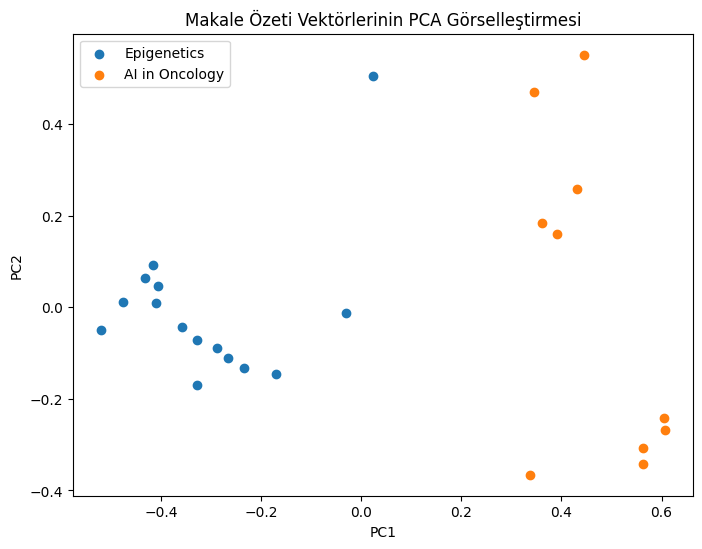

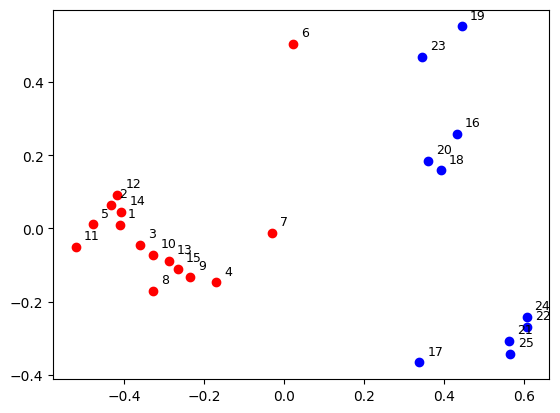

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lr, embeddings, y, cv=5)
print("5-Fold Cross-Validation Accuracy:", scores)
print("Mean Accuracy:", scores.mean())
for i, acc in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {acc:.2f}")
print(f"\n📊 Mean Accuracy: {scores.mean():.2f}")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
for label in set(y):
    idxs = [i for i, val in enumerate(y) if val == label]
    plt.scatter(reduced[idxs, 0], reduced[idxs, 1], label="Epigenetics" if label==0 else "AI in Oncology")
plt.legend()
plt.title("Makale Özeti Vektörlerinin PCA Görselleştirmesi")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
for i, label in enumerate(y):
    plt.scatter(reduced[i, 0], reduced[i, 1], c='red' if label==0 else 'blue')
    plt.text(reduced[i, 0]+0.02, reduced[i, 1]+0.02, f'{i+1}', fontsize=9)


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Kullanıcıdan özet al
user_text = input("📝 Makale özetinizi girin: ").strip()

if not user_text:
    print("⚠️ Lütfen geçerli bir özet giriniz.")
else:
    # Embedding'e çevir
    user_embedding = model.encode([user_text])

    # Alan tahmini
    predicted_label = model_lr.predict(user_embedding)[0]
    label_map = {0: "Epigenetics", 1: "AI in Oncology"}
    print(f"\n📌 Tahmin Edilen Alan: {label_map[predicted_label]}")

    # Benzerlik analizleri
    similarities = cosine_similarity(user_embedding, embeddings)[0]
    top_n = similarities.argsort()[-3:][::-1]

    print("\n🔍 En Benzer 3 Makale:")
    for i in top_n:
        print(f"{i+1}. makale - {similarities[i]*100:.2f}% benzerlik: {df_all['Title'][i]}")
# Eğer benzerlik %50'nin altındaysa uyar
if similarities[top_n[0]] < 0.5:
    print("\n⚠️ Benzerlik skorları düşük. Belki bu özet mevcut kümelerden farklı bir alana ait olabilir.")


📝 Makale özetinizi girin: Histone acetylation at H3K27 promotes stem cell pluripotency by activating key transcriptional regulators. This mechanism is disrupted in neurodevelopmental disorders involving chromatin remodelers

📌 Tahmin Edilen Alan: Epigenetics

🔍 En Benzer 3 Makale:
2. makale - 61.18% benzerlik: Histone modifications and transcriptional memory in cancer epigenetics
11. makale - 57.43% benzerlik: Epigenetic mechanisms in postsurgical pain
15. makale - 56.85% benzerlik: HIF1-driven chromatin remodeling in chronic kidney disease


In [21]:
df_all.to_csv("makale_ozetleri_tumlesik.csv", index=False)
import numpy as np
np.save("embeddings.npy", embeddings)


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Kullanıcının özet metni
user_text = " By integrating transcriptomic and proteomic data, researchers applied unsupervised deep learning to classify tumor subtypes. The model revealed novel clusters beyond traditional histopathology, offering a new approach for precision oncology."

# 2. SentenceTransformer ile encode
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# 3. Embedding işlemi
user_embedding = model.encode([user_text])

# 4. Tüm veri seti embedding'leri (önceden yüklenmiş olmalı)
# Örnek olarak buraya dummy veri yükleyip benzerlik hesaplayacağım
# Gerçek kullanımda df_all['Abstract'] listesinin embedding'leri alınmalı

# Dummy abstract list for demonstration
abstracts = df_all['Abstract'].tolist()
# abstract_embeddings = embeddings  # daha önce kaydedilen vektörler (bu satıra gerek yok)

# Embedding of abstracts
abstract_embeddings = model.encode(abstracts)

# 5. Cosine similarity
similarities = cosine_similarity(user_embedding, abstract_embeddings)[0]
top_indices = similarities.argsort()[-3:][::-1]

# 6. En benzer 3 makale ve benzerlik oranları
results = [(i, abstracts[i], similarities[i]) for i in top_indices]

# Benzerlikleri ekrana yazdır
for idx, (i, text, score) in enumerate(results):
    print(f"{idx+1}. ({score:.2f}) -> {df_all.iloc[i]['Title']}")

# Eşik değerini kullanarak filtreleme (isteğe bağlı)
threshold = 0.6
filtered_results = [(i, text, score) for i, text, score in results if score >= threshold]
if filtered_results:
    print("\nEşik değerini geçen sonuçlar:")
    for idx, (i, text, score) in enumerate(filtered_results):
        print(f"{idx+1}. ({score:.2f}) -> {df_all.iloc[i]['Title']}")
else:
    print("\nEşik değerini geçen sonuç bulunmadı.")

1. (0.52) -> Explainable AI for cancer genomics: Trust and transparency
2. (0.50) -> Multi-omics integration using autoencoders to classify breast cancer subtypes
3. (0.49) -> Evolution of AI in clinical medicine and oncology

Eşik değerini geçen sonuç bulunmadı.


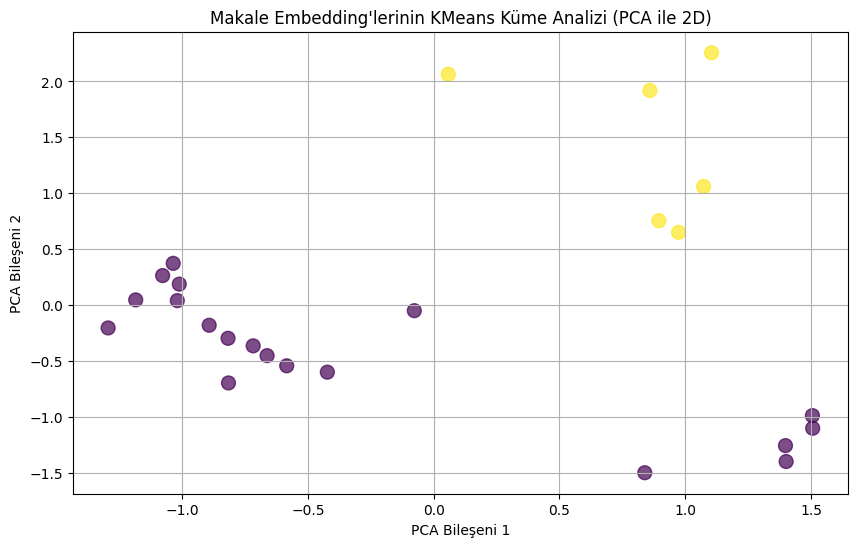

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer

# Veri setini yükle (önceden birleştirilmiş 25 makalelik veri)
df_all = pd.read_csv('/content/makale_ozetleri_tumlesik.csv')

# Embedding modeli
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_all['Abstract'].tolist())

# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Standardize et
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(reduced_embeddings)

# KMeans ile kümeleme (2 küme: Epigenetik ve AI in Oncology)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_embeddings)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(scaled_embeddings[:, 0], scaled_embeddings[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
plt.title("Makale Embedding'lerinin KMeans Küme Analizi (PCA ile 2D)")
plt.xlabel("PCA Bileşeni 1")
plt.ylabel("PCA Bileşeni 2")
plt.grid(True)
plt.show()


In [24]:
from sklearn.metrics import silhouette_score

score = silhouette_score(embeddings, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.095574945


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    print(f"Küme Sayısı: {k} → Silhouette Score: {score:.4f}")


Küme Sayısı: 2 → Silhouette Score: 0.1673
Küme Sayısı: 3 → Silhouette Score: 0.0896
Küme Sayısı: 4 → Silhouette Score: 0.0771
Küme Sayısı: 5 → Silhouette Score: 0.0506


In [26]:
cluster_0_indices = [i for i, label in enumerate(kmeans.labels_) if label == 0]
for i in cluster_0_indices[:3]:
    print(f"{i+1}. {df_all.iloc[i]['Title']}")


7. Multi-omics integration in IBS epigenetics
10. Chronic pain and epigenetic modulation in therapy


In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Küme 1'deki örnek vektörleri al
cluster_1_indices = np.where(cluster_labels == 1)[0]
cluster_1_vectors = embeddings[cluster_1_indices]

# Küme merkezini hesapla
cluster_1_center = cluster_1_vectors.mean(axis=0)

# Her bir örneğin merkeze olan benzerliğini hesapla
similarities_cluster_1 = cosine_similarity([cluster_1_center], cluster_1_vectors)[0]

# En yakın 2 örneği bul
top_2_indices_cluster_1 = similarities_cluster_1.argsort()[-2:][::-1]
top_2_articles_cluster_1 = [(cluster_1_indices[i], df_all.iloc[cluster_1_indices[i]]["Title"], similarities_cluster_1[i]) for i in top_2_indices_cluster_1]

top_2_articles_cluster_1


[(np.int64(9),
  'Chronic pain and epigenetic modulation in therapy',
  np.float32(0.75497496)),
 (np.int64(7),
  'Advances in cardiovascular epigenetics',
  np.float32(0.7189984))]

In [28]:
from sklearn.cluster import KMeans

# KMeans modelini tekrar eğit
kmeans_model = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans_model.fit_predict(embeddings)


In [29]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Cluster 0 için benzerlik skorlarını hesapla
cluster_0_indices = np.where(cluster_labels == 0)[0]
cluster_0_embeddings = embeddings[cluster_0_indices]
cluster_0_center = kmeans_model.cluster_centers_[0]
similarities_0 = cosine_similarity([cluster_0_center], cluster_0_embeddings)[0]

# En yakın 2 makaleyi bul
top_2_cluster_0 = similarities_0.argsort()[-2:][::-1]
closest_0 = [(cluster_0_indices[i], df_all['Title'][cluster_0_indices[i]], similarities_0[i]) for i in top_2_cluster_0]
print(closest_0)


[(np.int64(10), 'Epigenetic mechanisms in postsurgical pain', np.float32(0.8511027)), (np.int64(4), 'Epigenetic crosstalk in embryonic stem cell differentiation', np.float32(0.7833259))]


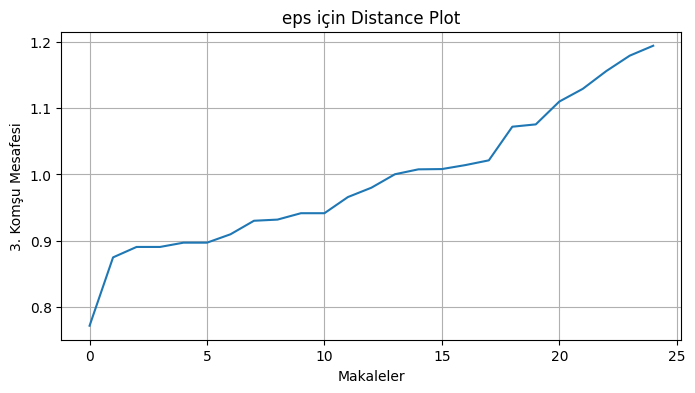

In [30]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(embeddings)
distances, indices = nbrs.kneighbors(embeddings)

# Ortalama 2. veya 3. en yakın mesafe
plt.figure(figsize=(8, 4))
plt.plot(sorted(distances[:, 2]))
plt.title("eps için Distance Plot")
plt.xlabel("Makaleler")
plt.ylabel("3. Komşu Mesafesi")
plt.grid(True)
plt.show()


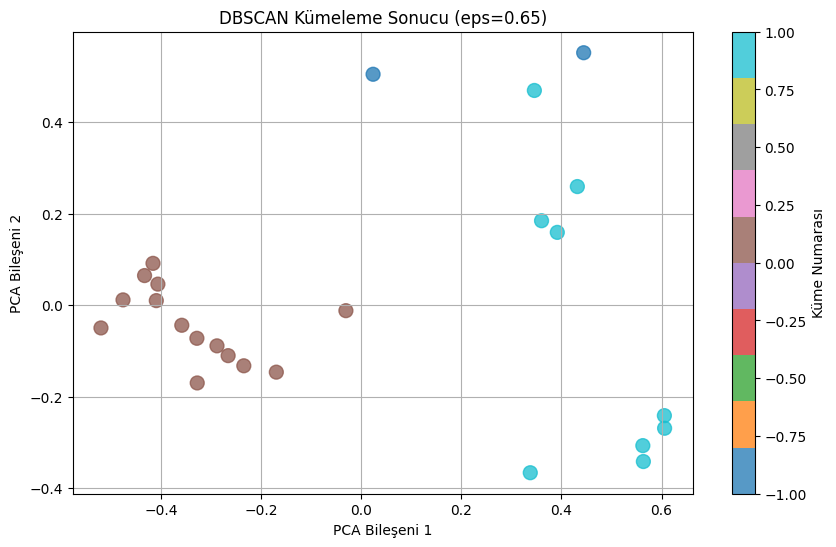

Küme Dağılımı: {np.int64(-1): np.int64(2), np.int64(0): np.int64(14), np.int64(1): np.int64(9)}


In [31]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# DBSCAN ile kümeleme
dbscan = DBSCAN(eps=0.65, min_samples=2, metric='cosine')
dbscan_labels = dbscan.fit_predict(embeddings)

# PCA ile görselleştirme (önceden yapılmış olabilir)
from sklearn.decomposition import PCA
reduced = PCA(n_components=2).fit_transform(embeddings)

# Renkli görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=dbscan_labels, cmap='tab10', s=100, alpha=0.75)
plt.title("DBSCAN Kümeleme Sonucu (eps=0.65)")
plt.xlabel("PCA Bileşeni 1")
plt.ylabel("PCA Bileşeni 2")
plt.colorbar(label="Küme Numarası")
plt.grid(True)
plt.show()

# Küme dağılımı
import numpy as np
unique, counts = np.unique(dbscan_labels, return_counts=True)
print("Küme Dağılımı:", dict(zip(unique, counts)))


In [32]:
 df_all["DBSCAN_Cluster"] = dbscan_labels
from sklearn.feature_extraction.text import TfidfVectorizer

for cluster in sorted(set(dbscan_labels)):
    cluster_abstracts = df_all[df_all["DBSCAN_Cluster"] == cluster]["Abstract"]
    vectorizer = TfidfVectorizer(max_features=10, stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(cluster_abstracts)
    keywords = vectorizer.get_feature_names_out()
    print(f"Küme {cluster} için öne çıkan kelimeler: {list(keywords)}")


Küme -1 için öne çıkan kelimeler: ['accurate', 'approach', 'architecture', 'asd', 'autoencoders', 'classification', 'deep', 'enabled', 'heterogeneous', 'learning']
Küme 0 için öne çıkan kelimeler: ['chromatin', 'dna', 'epigenetic', 'epigenome', 'gene', 'histone', 'immune', 'methylation', 'modifications', 'regulation']
Küme 1 için öne çıkan kelimeler: ['ai', 'approved', 'cancer', 'deep', 'improved', 'learning', 'model', 'prediction', 'text', 'tools']


In [33]:
from sklearn.metrics import silhouette_score

def test_dbscan(embeddings, eps_values, min_samples=2):
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = db.fit_predict(embeddings)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        print(f"Küme Sayısı (eps={eps}): {n_clusters}")
        if n_clusters > 1:
            score = silhouette_score(embeddings, labels, metric='cosine')
            print(f"📊 Silhouette Score: {score:.4f}\n")
        else:
            print("⚠️ Küme sayısı 1 olduğundan silhouette skoru hesaplanamaz.\n")

# Denemek için çağır:
test_dbscan(embeddings, eps_values=[0.3, 0.5, 0.8])


Küme Sayısı (eps=0.3): 2
📊 Silhouette Score: -0.1039

Küme Sayısı (eps=0.5): 3
📊 Silhouette Score: 0.2062

Küme Sayısı (eps=0.8): 1
⚠️ Küme sayısı 1 olduğundan silhouette skoru hesaplanamaz.



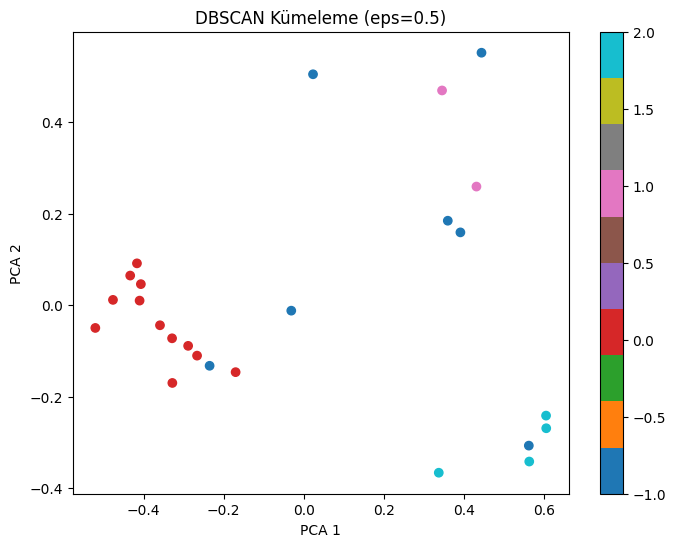

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

best_eps = 0.5  # örnek
db = DBSCAN(eps=best_eps, min_samples=2, metric='cosine')
labels = db.fit_predict(embeddings)

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10')
plt.title(f"DBSCAN Kümeleme (eps={best_eps})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()


In [35]:
# eps=0.5 ile en iyi sonucu aldık, tekrar uygulayalım
db = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
cluster_labels = db.fit_predict(embeddings)

# Cluster etiketlerini veri setine ekleyelim
df_all['DBSCAN_Cluster'] = cluster_labels

# Her kümedeki domain dağılımını görelim
cluster_summary = df_all.groupby(['DBSCAN_Cluster', 'Domain']).size().unstack(fill_value=0)
print(cluster_summary)


Domain          AI in Oncology  Epigenetics
DBSCAN_Cluster                             
-1                           4            3
 0                           0           12
 1                           2            0
 2                           4            0


In [36]:
for cluster in sorted(df_all['DBSCAN_Cluster'].unique()):
    print(f"\n📦 Küme {cluster} (Toplam {len(df_all[df_all['DBSCAN_Cluster']==cluster])} makale):")
    sample_titles = df_all[df_all['DBSCAN_Cluster'] == cluster][['Title', 'Domain']].head(3)
    for _, row in sample_titles.iterrows():
        print(f"• [{row['Domain']}] {row['Title']}")



📦 Küme -1 (Toplam 7 makale):
• [Epigenetics] Neurobiological architecture and heterogeneous etiology of ASD
• [Epigenetics] Multi-omics integration in IBS epigenetics
• [Epigenetics] LPS-induced immune memory and histone reprogramming

📦 Küme 0 (Toplam 12 makale):
• [Epigenetics] Chromatin remodeling and the epigenetic control of cell fate
• [Epigenetics] Histone modifications and transcriptional memory in cancer epigenetics
• [Epigenetics] The DNA methylation landscape in aging and age-related diseases

📦 Küme 1 (Toplam 2 makale):
• [AI in Oncology] Deep learning for early diagnosis of colorectal cancer using histology slides
• [AI in Oncology] Histopathology prediction via AI from image data

📦 Küme 2 (Toplam 4 makale):
• [AI in Oncology] Transformer-based models improve clinical trial matching in oncology
• [AI in Oncology] Evolution of AI in clinical medicine and oncology
• [AI in Oncology] AI applications in lung cancer diagnostics and prognosis


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# TF-IDF ile metin vektörleştirme
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_all['Abstract'])

# Küme bilgilerini al
df_all['DBSCAN_Cluster'] = cluster_labels

# Küme bazlı TF-IDF değerlerini hesaplayalım
cluster_keywords = {}
feature_names = vectorizer.get_feature_names_out()

# Her küme için en belirgin kelimeleri seç
for cluster_id in sorted(df_all['DBSCAN_Cluster'].unique()):
    indices = df_all[df_all['DBSCAN_Cluster'] == cluster_id].index
    cluster_tfidf = tfidf_matrix[indices].mean(axis=0).A1
    top_indices = cluster_tfidf.argsort()[::-1][:10]
    cluster_keywords[cluster_id] = [(feature_names[i], cluster_tfidf[i]) for i in top_indices]

cluster_keywords


{np.int64(-1): [('deep', np.float64(0.10536011803593998)),
  ('prediction', np.float64(0.08683422538722901)),
  ('learning', np.float64(0.07516409409863668)),
  ('heterogeneous', np.float64(0.05399492471560389)),
  ('neuronal', np.float64(0.05399492471560389)),
  ('architecture', np.float64(0.05399492471560389)),
  ('asd', np.float64(0.05399492471560389)),
  ('presents', np.float64(0.05399492471560389)),
  ('profile', np.float64(0.05399492471560389)),
  ('synaptogenesis', np.float64(0.05399492471560389))],
 np.int64(0): [('epigenetic', np.float64(0.13897919280004264)),
  ('methylation', np.float64(0.09613574856367889)),
  ('gene', np.float64(0.0844536816822998)),
  ('regulation', np.float64(0.07966283837379469)),
  ('dna', np.float64(0.07555169129077405)),
  ('histone', np.float64(0.07422709705891924)),
  ('modifications', np.float64(0.056179999744423684)),
  ('remodeling', np.float64(0.04907208026081178)),
  ('chromatin', np.float64(0.04907208026081178)),
  ('highlighted', np.float64(

<ipython-input-38-86be6cb248ab>:24: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


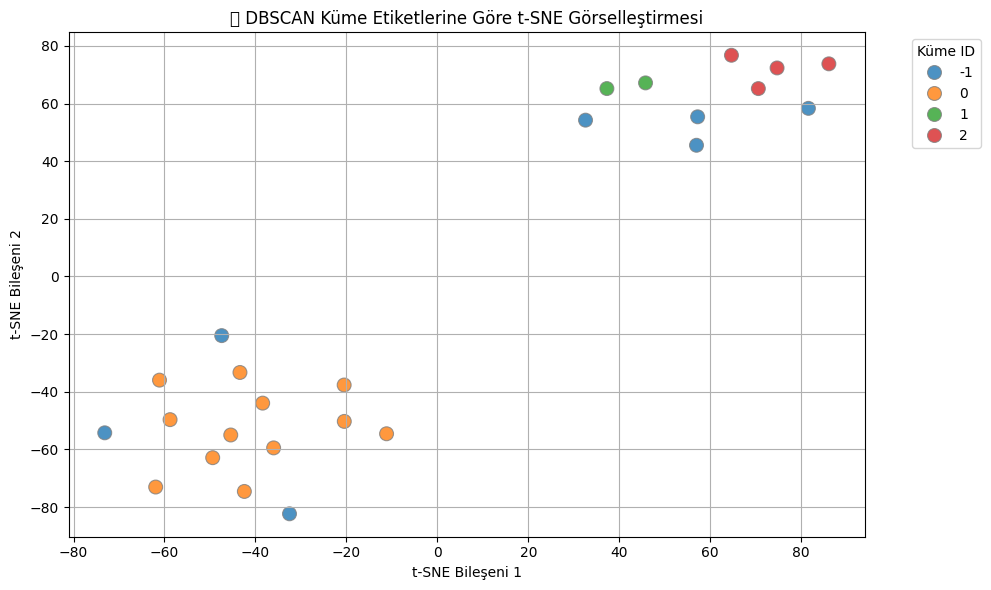

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# t-SNE ile 2D boyut indirgeme
tsne = TSNE(n_components=2, perplexity=5, random_state=42, metric='cosine')
tsne_results = tsne.fit_transform(embeddings)

# Küme etiketlerini kullan
df_all["TSNE-1"] = tsne_results[:, 0]
df_all["TSNE-2"] = tsne_results[:, 1]

plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", n_colors=len(set(cluster_labels)))
sns.scatterplot(
    x="TSNE-1", y="TSNE-2", hue="DBSCAN_Cluster",
    data=df_all, palette=palette, s=100, alpha=0.8, edgecolor="gray"
)
plt.title("📌 DBSCAN Küme Etiketlerine Göre t-SNE Görselleştirmesi")
plt.xlabel("t-SNE Bileşeni 1")
plt.ylabel("t-SNE Bileşeni 2")
plt.legend(title="Küme ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
cluster_descriptions = {
    0: "Articles focusing on epigenetic gene regulation, DNA methylation, and histone modifications.",
    1: "Imaging-based AI applications extracting information from histopathology slides using deep learning.",
    2: "Clinically integrated AI tools approved by the FDA for use in decision support systems.",
    -1: "Outliers: Articles with mixed profiles, including neurodevelopmental disorders and atypical content."
}


<ipython-input-40-64a567a0ca0e>:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


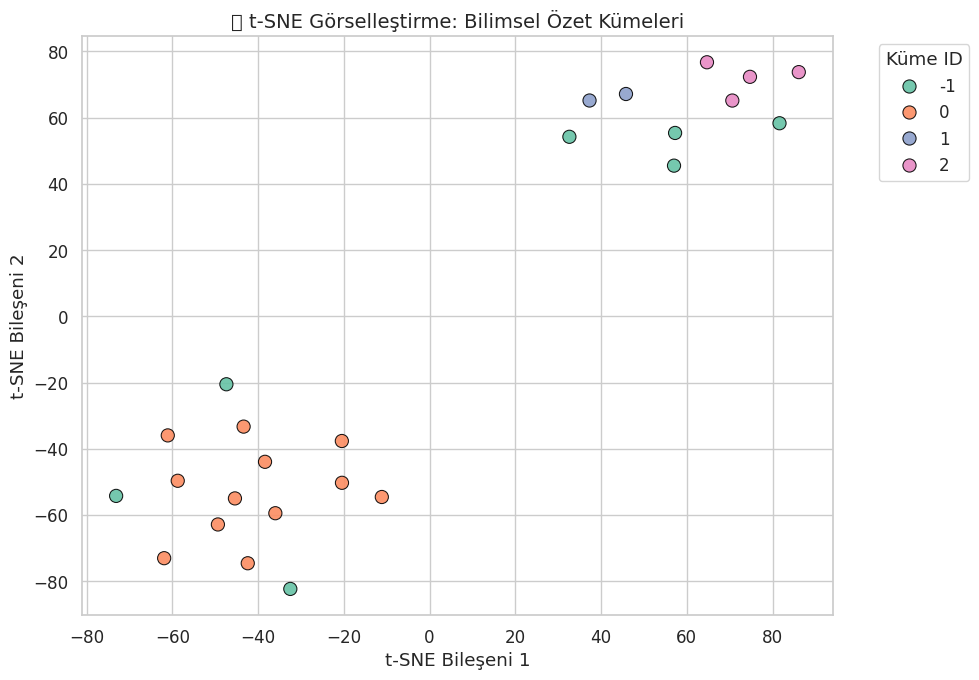

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

# TSNE parametrelerini optimize et (perplexity veri sayısına göre ayarlanabilir)
tsne = TSNE(n_components=2, perplexity=5, random_state=42, metric="cosine")
tsne_results = tsne.fit_transform(embeddings)

# Sonuçları DataFrame'e ekle
df_all['TSNE-1'] = tsne_results[:, 0]
df_all['TSNE-2'] = tsne_results[:, 1]

# Renk paleti otomatik
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font_scale=1.1)

ax = sns.scatterplot(
    x="TSNE-1",
    y="TSNE-2",
    hue="DBSCAN_Cluster",
    data=df_all,
    palette="Set2",
    s=90,
    alpha=0.9,
    edgecolor='black'
)

plt.title("📊 t-SNE Görselleştirme: Bilimsel Özet Kümeleri", fontsize=14)
plt.xlabel("t-SNE Bileşeni 1")
plt.ylabel("t-SNE Bileşeni 2")
plt.legend(title="Küme ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [41]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Daha önce kullanılan modeli yükleyelim
model = SentenceTransformer('all-MiniLM-L6-v2')

# Kullanıcıdan makale özeti al
user_input = input("🔍 Makale özetinizi girin: ")

# Embed et
user_embedding = model.encode([user_input])

# Var olan tüm embedding'lerle benzerlik hesapla (önceden elde edilmiş olan `embeddings` değişkeni kullanılmalı)
similarities = cosine_similarity(user_embedding, embeddings)[0]

# En benzer 3 makaleyi bul
top_indices = np.argsort(similarities)[-3:][::-1]
top_similarities = [(int(i), df_all.iloc[i]["Title"], float(similarities[i])) for i in top_indices]

# Küme tahmini (en benzer embedding'in kümesini kullan)
predicted_cluster = df_all.iloc[top_indices[0]]["DBSCAN_Cluster"]

# Küme açıklamaları (önceden tanımlanmış olmalı)
cluster_descriptions = {
    0: "Epigenetic regulation, DNA methylation, and histone modification–focused articles.",
    1: "Image-based AI applications extracting information from histopathology slides.",
    2: "FDA-approved AI tools supporting clinical decision processes in oncology.",
    -1: "Outliers — interdisciplinary or mixed-profile articles."
}

# Sonuçları yazdır
print("\n🔎 En benzer 3 makale:")
for idx, title, score in top_similarities:
    print(f"- [{score:.3f}] {title}")

print(f"\n🧠 Tahmin edilen küme: {predicted_cluster}")
print(f"📚 Küme açıklaması: {cluster_descriptions[predicted_cluster]}")


🔍 Makale özetinizi girin: A convolutional neural network trained on 50,000 pathology images accurately identifies breast cancer subtypes, outperforming traditional diagnostic tools and improving clinical decision-making in early-stage patients

🔎 En benzer 3 makale:
- [0.618] Deep learning for early diagnosis of colorectal cancer using histology slides
- [0.526] Evolution of AI in clinical medicine and oncology
- [0.524] FDA-approved AI tools and their impact in cancer diagnostics

🧠 Tahmin edilen küme: 1
📚 Küme açıklaması: Image-based AI applications extracting information from histopathology slides.


In [42]:
user_abstracts = [
    "Artificial intelligence is transforming cancer diagnostics through multimodal data integration and clinical decision support.",
    "Epigenetic regulation through DNA methylation plays a critical role in colorectal cancer progression.",
    "Deep learning algorithms assist in radiology by detecting tumor types from CT scans with high accuracy.",
    "Histone acetylation and chromatin remodeling are essential in gene regulation and cell fate decisions.",
    "Transformer-based models improve the classification of breast cancer subtypes using gene expression data."
]


In [43]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Tüm özetlerin embedding’lerini al
user_embeddings = model.encode(user_abstracts)

for idx, user_embed in enumerate(user_embeddings):
    similarities = cosine_similarity([user_embed], embeddings)[0]
    top_n = similarities.argsort()[-3:][::-1]
    predicted_cluster = db.fit_predict([user_embed])[0]  # DBSCAN ile kümeyi tahmin et

    # Küme açıklaması varsa göster
    cluster_desc = cluster_descriptions.get(predicted_cluster, "No description available.")

    print(f"\n📘 Makale {idx+1}: {user_abstracts[idx]}")
    print(f"🧠 Tahmin edilen küme: {predicted_cluster}")
    print(f"📚 Küme açıklaması: {cluster_desc}")
    print("🔍 En benzer 3 makale:")
    for i in top_n:
        print(f"- [{similarities[i]:.3f}] {df_all['Title'][i]}")



📘 Makale 1: Artificial intelligence is transforming cancer diagnostics through multimodal data integration and clinical decision support.
🧠 Tahmin edilen küme: -1
📚 Küme açıklaması: Outliers — interdisciplinary or mixed-profile articles.
🔍 En benzer 3 makale:
- [0.689] Evolution of AI in clinical medicine and oncology
- [0.681] FDA-approved AI tools and their impact in cancer diagnostics
- [0.543] AI applications in lung cancer diagnostics and prognosis

📘 Makale 2: Epigenetic regulation through DNA methylation plays a critical role in colorectal cancer progression.
🧠 Tahmin edilen küme: -1
📚 Küme açıklaması: Outliers — interdisciplinary or mixed-profile articles.
🔍 En benzer 3 makale:
- [0.894] Epigenetics and colorectal cancer pathogenesis
- [0.719] Epigenetic mechanisms in postsurgical pain
- [0.595] Epigenetic crosstalk in embryonic stem cell differentiation

📘 Makale 3: Deep learning algorithms assist in radiology by detecting tumor types from CT scans with high accuracy.
🧠 Tahmi

In [44]:
from sklearn.cluster import KMeans

# KMeans ile 3 küme oluştur
kmeans = KMeans(n_clusters=3, random_state=42)
df_all['KMeans_Cluster'] = kmeans.fit_predict(embeddings)

# Hedef label artık bu!
y = df_all['KMeans_Cluster']
X = embeddings


CV Scores: [1.    0.875 0.875]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


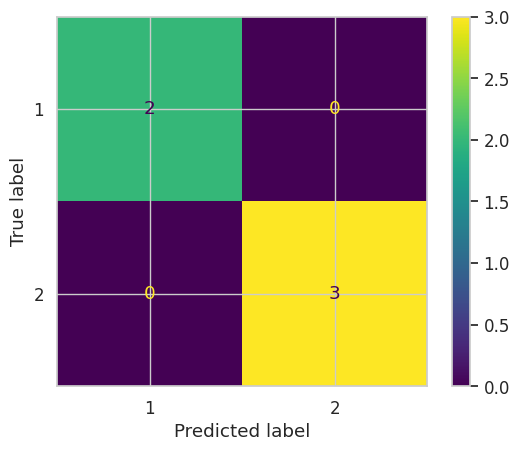

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Eğitim-test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(clf, X, y, cv=3)
print("CV Scores:", scores)

# Tahmin
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n", report)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)


In [46]:
# Abstract'ları encode et
user_embeddings = model.encode(user_abstracts)

# Hangi kümeye ait olduklarını tahmin et
predicted_clusters = clf.predict(user_embeddings)

# Sonuçları yazdır
for i, abstract in enumerate(user_abstracts):
    print(f"\n📘 Abstract {i+1}: {abstract}")
    print(f"🧠 Tahmin edilen KMeans kümesi: {predicted_clusters[i]}")



📘 Abstract 1: Artificial intelligence is transforming cancer diagnostics through multimodal data integration and clinical decision support.
🧠 Tahmin edilen KMeans kümesi: 1

📘 Abstract 2: Epigenetic regulation through DNA methylation plays a critical role in colorectal cancer progression.
🧠 Tahmin edilen KMeans kümesi: 2

📘 Abstract 3: Deep learning algorithms assist in radiology by detecting tumor types from CT scans with high accuracy.
🧠 Tahmin edilen KMeans kümesi: 1

📘 Abstract 4: Histone acetylation and chromatin remodeling are essential in gene regulation and cell fate decisions.
🧠 Tahmin edilen KMeans kümesi: 2

📘 Abstract 5: Transformer-based models improve the classification of breast cancer subtypes using gene expression data.
🧠 Tahmin edilen KMeans kümesi: 1


In [47]:
cluster_descriptions = {
    0: "🧪 Mixed content (You may need to inspect this manually)",  # Henüz veri yok
    1: "🤖 AI in oncology: Deep learning, clinical decision support, and model-based cancer predictions.",
    2: "🧬 Epigenetic regulation: DNA methylation, histone modification, chromatin remodeling in cancer."
}


In [48]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

# Verileri ve modeli yükle
df_all = pd.read_csv("/content/makale_ozetleri_tumlesik.csv")
model = SentenceTransformer("all-MiniLM-L6-v2")

# Embedding'leri yükle ya da hesapla
embeddings = model.encode(df_all['Abstract'].tolist(), convert_to_tensor=False)

# Yeni kümeler için açıklamalar
cluster_descriptions = {
    0: "🧪 Mixed content (You may need to inspect this manually)",
    1: "🤖 AI in oncology: Deep learning, clinical decision support, and model-based cancer predictions.",
    2: "🧬 Epigenetic regulation: DNA methylation, histone modification, chromatin remodeling in cancer."
}

# KMeans ile clustering yapılmış olmalı ve clf (LogisticRegression) eğitilmiş olmalı

# ✅ Semantic Search + ML Prediction Fonksiyonu
def semantic_predict_batch(queries, top_k=3):
    results = []
    query_embeddings = model.encode(queries, convert_to_tensor=True)  # Tensor olarak encode et
    all_embeddings = util.tensor(embeddings) if not hasattr(embeddings, "shape") else embeddings  # Tensor check

    for idx, query_embedding in enumerate(query_embeddings):
        # Benzerlik skorları
        similarities = util.pytorch_cos_sim(query_embedding, all_embeddings)[0]  # SAFE version

        # Eğer top_k, benzerliklerden büyükse düzelt
        k = min(int(abs(top_k)), len(similarities))

        if k == 0:
            results.append({
                "query": queries[idx],
                "predicted_cluster": -1,
                "cluster_description": "⚠️ No similar documents found.",
                "top_matches": []
            })
            continue

        top_results = similarities.topk(k)
        top_indices = top_results.indices.cpu().numpy()
        top_scores = top_results.values.cpu().numpy()

        # ML tahmini
        query_np = query_embedding.cpu().numpy()
        predicted_cluster = clf.predict([query_np])[0]
        cluster_description = cluster_descriptions.get(int(predicted_cluster), "Unknown cluster")

        match_info = []
        for i in range(k):
            index = top_indices[i]
            score = float(top_scores[i])
            title = df_all.iloc[index]['Title']
            match_info.append((round(score, 3), title))

        results.append({
            "query": queries[idx],
            "predicted_cluster": int(predicted_cluster),
            "cluster_description": cluster_description,
            "top_matches": match_info
        })

    return results


# Örnek sorgular
sample_queries = [
    "Deep learning techniques are widely used to classify cancerous tissues in pathology slides.",
    "Epigenetic regulation through DNA methylation plays a critical role in colorectal cancer progression.",
    "Artificial intelligence is transforming cancer diagnostics through multimodal data integration."
]

# Fonksiyonu çağır ve sonuçları al
semantic_results = semantic_predict_batch(sample_queries)

# Sonuçları yazdır
for res in semantic_results:
    print(f"\n📘 Query: {res['query']}")
    print(f"🧠 Predicted Cluster: {res['predicted_cluster']}")
    print(f"📚 Cluster Description: {res['cluster_description']}")
    print("🔍 Top Matches:")
    for score, title in res['top_matches']:
        print(f" - ({score}) {title}")


📘 Query: Deep learning techniques are widely used to classify cancerous tissues in pathology slides.
🧠 Predicted Cluster: 1
📚 Cluster Description: 🤖 AI in oncology: Deep learning, clinical decision support, and model-based cancer predictions.
🔍 Top Matches:
 - (0.636) Deep learning for early diagnosis of colorectal cancer using histology slides
 - (0.571) Histopathology prediction via AI from image data
 - (0.515) Evolution of AI in clinical medicine and oncology

📘 Query: Epigenetic regulation through DNA methylation plays a critical role in colorectal cancer progression.
🧠 Predicted Cluster: 2
📚 Cluster Description: 🧬 Epigenetic regulation: DNA methylation, histone modification, chromatin remodeling in cancer.
🔍 Top Matches:
 - (0.894) Epigenetics and colorectal cancer pathogenesis
 - (0.719) Epigenetic mechanisms in postsurgical pain
 - (0.595) Epigenetic crosstalk in embryonic stem cell differentiation

📘 Query: Artificial intelligence is transforming cancer diagnostics through mu

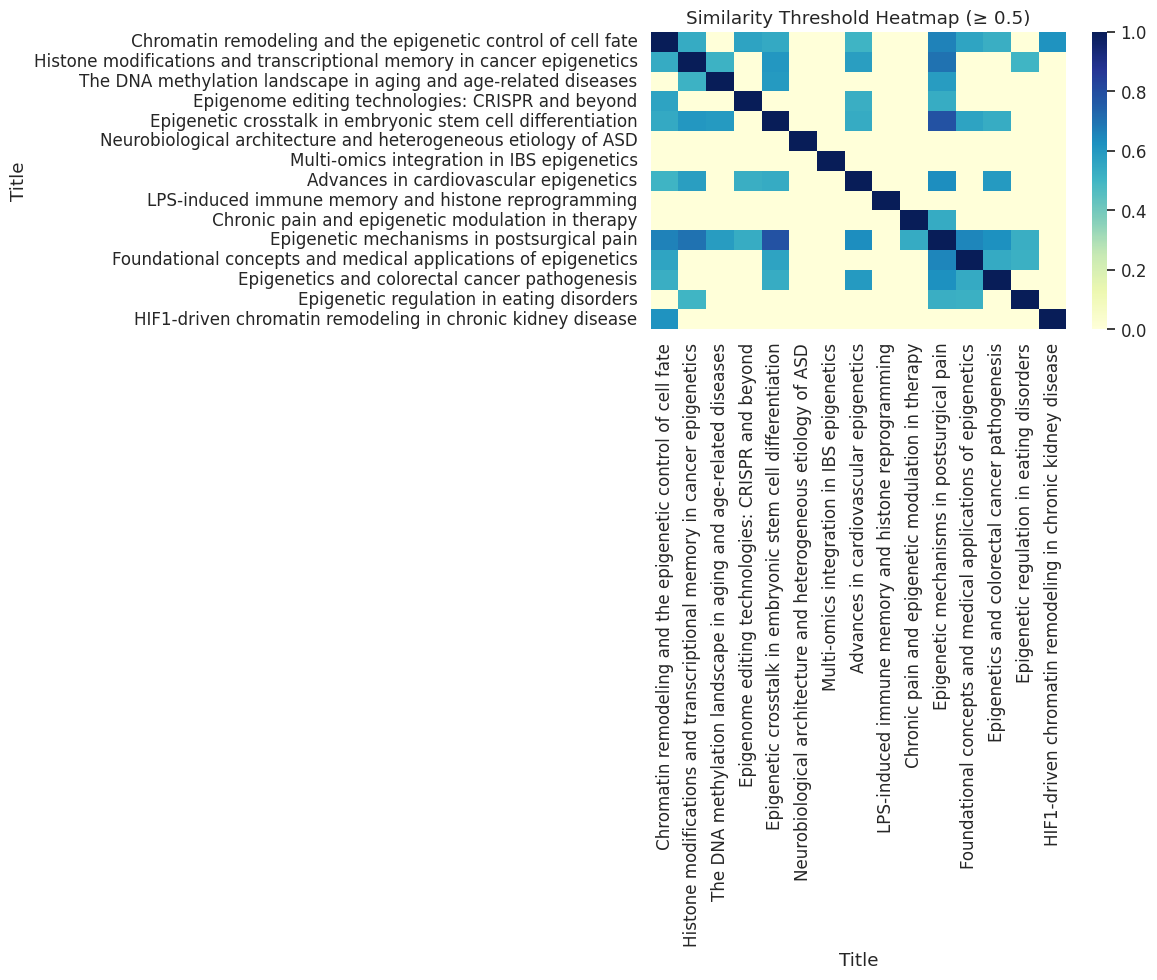

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_all['Abstract'].tolist())

# Embedding'leri yeniden hesaplamaya gerek yok, önceden kullanıldığını varsayalım
# embeddings değişkeni zaten mevcut
similarity_matrix = cosine_similarity(embeddings)

# Benzerlik eşiğine göre filtreleme
threshold = 0.5
filtered_sim_matrix = np.where(similarity_matrix >= threshold, similarity_matrix, 0)

# DataFrame'e dönüştürme
sim_df = pd.DataFrame(filtered_sim_matrix, columns=df_all['Title'], index=df_all['Title'])

# Büyük veri setleri için görsel okunabilirlik adına sınırlama yapılabilir
subset_sim_df = sim_df.iloc[:15, :15]  # İlk 15 makaleyi görselleştir

# Isı haritası çizimi
plt.figure(figsize=(12, 10))
sns.heatmap(subset_sim_df, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Similarity Threshold Heatmap (≥ 0.5)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [50]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Embed model and compute similarity matrix
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_all['Abstract'].tolist())
similarity_matrix = cosine_similarity(embeddings)

# Threshold for visualization
threshold = 0.5
mask = similarity_matrix >= threshold
masked_similarity = np.where(mask, similarity_matrix, np.nan)

# Create DataFrame
sim_df = pd.DataFrame(masked_similarity, index=df_all['Title'], columns=df_all['Title'])

# Melt for Plotly heatmap
sim_melted = sim_df.reset_index().melt(id_vars='Title', var_name='Compared To', value_name='Similarity')
sim_melted = sim_melted.dropna()

# Interactive Heatmap
fig = px.density_heatmap(
    sim_melted,
    x="Compared To",
    y="Title",
    z="Similarity",
    color_continuous_scale="Viridis",
    title="Interactive Similarity Heatmap (≥ 0.5)",
    labels={"Similarity": "Cosine Similarity"}
)
fig.update_layout(height=800, width=1000)
fig.show()


In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# df_all: Mevcut tüm makalelerin verisi
# embeddings: Her makalenin embedding vektörü
# cluster_labels: Daha önce DBSCAN ile belirlenen küme etiketleri

# Küme sayısını ve her küme için ortalama embedding'i hesapla
unique_clusters = sorted(np.unique(cluster_labels))
cluster_centroids = {}
for cluster_id in unique_clusters:
    indices = np.where(cluster_labels == cluster_id)[0]
    if len(indices) > 0:
        cluster_centroids[cluster_id] = np.mean(embeddings[indices], axis=0)

# Her makalenin bulunduğu küme merkeziyle benzerliğini hesaplayalım
cluster_similarities = []
for i, vec in enumerate(embeddings):
    cluster_id = cluster_labels[i]
    centroid_vec = cluster_centroids[cluster_id]
    sim = cosine_similarity([vec], [centroid_vec])[0][0]
    cluster_similarities.append(sim)

# Sonuçları dataframe'e ekleyelim
df_all["Cluster_CosineSim"] = cluster_similarities

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df_all


,Domain,Title,Abstract,Cluster_CosineSim
0,Epigenetics,Chromatin remodeling and the epigenetic control of cell fate,Epigenetic regulation via chromatin remodeling proteins such as SWI/SNF complexes plays a pivotal role...,0.771843
1,Epigenetics,Histone modifications and transcriptional memory in cancer epigenetics,Histone acetylation and methylation are central to the maintenance of epigenetic memory...,0.764856
2,Epigenetics,The DNA methylation landscape in aging and age-related diseases,Age-associated changes in DNA methylation have been linked to alterations in immune function...,0.691481
3,Epigenetics,Epigenome editing technologies: CRISPR and beyond,New tools like dCas9-based epigenome editors allow precise targeting of epigenetic marks...,0.700637
4,Epigenetics,Epigenetic crosstalk in embryonic stem cell differentiation,"Interplay between DNA methylation, histone modifications, and non-coding RNAs governs differentiation...",0.793348
5,Epigenetics,Neurobiological architecture and heterogeneous etiology of ASD,ASD presents a heterogeneous profile in neuronal architecture and synaptogenesis...,0.483946
6,Epigenetics,Multi-omics integration in IBS epigenetics,"This study integrated gut microbiome, host epigenome, and transcriptome data in IBS...",0.487476
7,Epigenetics,Advances in cardiovascular epigenetics,Epigenetic advances are highlighted in cardiology and surgery...,0.759654
8,Epigenetics,LPS-induced immune memory and histone reprogramming,LPS induces innate immune tolerance via lack of histone activation...,0.470170
9,Epigenetics,Chronic pain and epigenetic modulation in therapy,Pain-related gene regulation may be epigenetically modulated...,0.654736


<ipython-input-52-140cac7dad27>:40: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



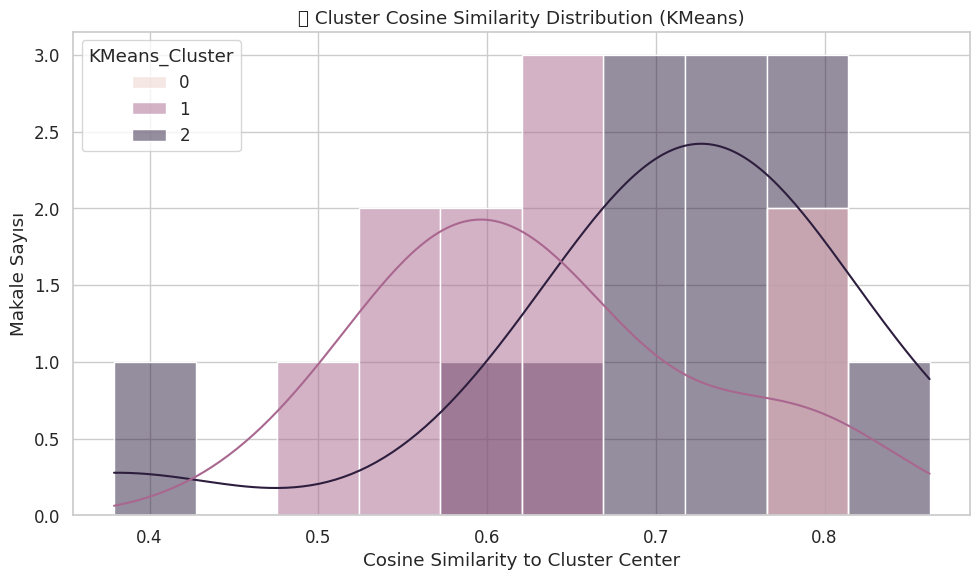

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Importing KMeans for clustering


# Küme merkezlerini bul
# 🎯 'KMeans_Cluster' sütununu oluşturuyoruz (eğer yoksa)
if 'KMeans_Cluster' not in df_all.columns:
    kmeans = KMeans(n_clusters=3, random_state=42) # KMeans modelini başlatıyoruz
    df_all['KMeans_Cluster'] = kmeans.fit_predict(embeddings) # Kümeleri tahmin edip sütuna atıyoruz

df_all['KMeans_Cluster'] = df_all['KMeans_Cluster'].astype(int)
cluster_centers = {}

for cluster in df_all['KMeans_Cluster'].unique():
    indices = df_all[df_all['KMeans_Cluster'] == cluster].index
    if len(indices) > 0:
        center = np.mean([embeddings[i] for i in indices], axis=0)
        cluster_centers[cluster] = center

# Her abstract'ın kendi küme merkezine cosine benzerliği
cosine_sims = []
for i in range(len(df_all)):
    cluster = df_all.iloc[i]['KMeans_Cluster']
    center = cluster_centers.get(cluster)
    sim = cosine_similarity([embeddings[i]], [center])[0][0] if center is not None else 0
    cosine_sims.append(sim)

# DataFrame'e ekle
df_all['Cluster_CosineSim'] = cosine_sims

# Görselleştir
plt.figure(figsize=(10, 6))
sns.histplot(data=df_all, x="Cluster_CosineSim", hue="KMeans_Cluster", bins=10, kde=True)
plt.title("📊 Cluster Cosine Similarity Distribution (KMeans)")
plt.xlabel("Cosine Similarity to Cluster Center")
plt.ylabel("Makale Sayısı")
plt.tight_layout()
plt.show()

Cosine Similarity Distribution Per Cluster:
The distribution plot illustrates the average semantic similarity of each abstract to its assigned KMeans cluster center. Cluster 2 shows the highest internal consistency, suggesting a well-defined topic area (likely epigenetics). Cluster 1 is broader, possibly indicating more thematic variety within AI-based cancer research. Cluster 0 appears sparse, possibly representing overlapping or mixed-topic abstracts

In [53]:
# Eşik belirle: Küme merkezine benzerliği 0.5'ten az olanlar
low_sim_threshold = 0.5
anomalous_df = df_all[df_all["Cluster_CosineSim"] < low_sim_threshold]

# En düşük 5 örneği seç
anomalous_df_sorted = anomalous_df.sort_values(by="Cluster_CosineSim").head(5)

# İlgili sütunları göster (KMeans_Cluster'ı kullandık!)
print("⚠️ Anomalous Abstracts (cosine similarity < 0.5):\n")
for i, row in anomalous_df_sorted.iterrows():
    print(f"- [{row['Cluster_CosineSim']:.2f}] {row['Title']} — Domain: {row.get('Domain', 'N/A')}, Cluster: {row['KMeans_Cluster']}")


⚠️ Anomalous Abstracts (cosine similarity < 0.5):

- [0.38] Neurobiological architecture and heterogeneous etiology of ASD — Domain: Epigenetics, Cluster: 2
- [0.49] Multi-omics integration using autoencoders to classify breast cancer subtypes — Domain: AI in Oncology, Cluster: 1


In [54]:
feedback_log = []
for i, row in anomalous_df_sorted.iterrows():
    feedback_log.append({
        "Title": row["Title"],
        "Original_Cluster": int(row["KMeans_Cluster"]),
        "CosineSim": float(row["Cluster_CosineSim"]),
        "Suggested_Action": "Review or reassign manually"
    })

import pandas as pd
feedback_df = pd.DataFrame(feedback_log)
feedback_df.to_csv("cluster_review_log.csv", index=False)


In [55]:
!pip install gradio

import gradio as gr
import csv
import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# ------------------------
# MODEL ve VERİ HAZIRLIĞI
# ------------------------

df_all = pd.read_csv("/content/makale_ozetleri_tumlesik.csv")
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df_all["Abstract"].tolist())

# Eğitilmiş model ve cluster merkezleri hazır olmalı
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# KMeans clustering (3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
df_all["KMeans_Cluster"] = kmeans.fit_predict(embeddings)

# Logistic Regression eğitimi
X = embeddings
y = df_all["KMeans_Cluster"]
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

# Cluster centroid’lerini hesapla
cluster_centroids = {}
for cluster_id in df_all["KMeans_Cluster"].unique():
    idxs = df_all[df_all["KMeans_Cluster"] == cluster_id].index
    cluster_centroids[cluster_id] = np.mean([embeddings[i] for i in idxs], axis=0)

# Cluster açıklamaları
cluster_descriptions = {
    0: "🧪 Mixed content (may include heterogeneous abstracts).",
    1: "🤖 AI in oncology: Deep learning, clinical decision support, and model-based predictions.",
    2: "🧬 Epigenetic regulation: DNA methylation, histone modification, chromatin remodeling."
}

# ------------------------
# ABSTRACT ANALYSIS
# ------------------------

def analyze_abstract(input_abstract):
    try:
        input_vec = model.encode([input_abstract])[0]
        sims = cosine_similarity([input_vec], embeddings)[0]
        top_indices = np.argsort(sims)[::-1][:3]
        top_matches = [(round(float(sims[i]), 3), df_all.iloc[i]["Title"]) for i in top_indices]

        assigned_cluster = clf.predict([input_vec])[0]
        centroid_vec = cluster_centroids[assigned_cluster]
        cluster_sim = float(cosine_similarity([input_vec], [centroid_vec])[0][0])

        description = cluster_descriptions.get(assigned_cluster, "Unknown cluster")
        low_conf_msg = "⚠️ Low confidence in cluster assignment. Manual review recommended." if cluster_sim < 0.55 else ""

        return {
            "cluster_id": str(assigned_cluster),
            "description": description,
            "similarity_score": round(cluster_sim, 3),
            "similar_articles": top_matches,
            "warning": low_conf_msg
        }
    except Exception as e:
        return {
            "cluster_id": "Error",
            "description": "Something went wrong.",
            "similarity_score": 0,
            "similar_articles": [],
            "warning": f"❌ {str(e)}"
        }

# ------------------------
# FEEDBACK KAYDI
# ------------------------

def log_feedback(input_text, predicted_cluster, user_feedback, correct_cluster=None):
    file_exists = os.path.isfile("user_feedback.csv")
    with open("user_feedback.csv", "a", newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Abstract", "Predicted Cluster", "User Feedback", "Correct Cluster"])
        writer.writerow([input_text, predicted_cluster, user_feedback, correct_cluster])
    return "✅ Feedback saved! Thank you."

# ------------------------
# ANALİZ + FEEDBACK PIPELINE
# ------------------------

def full_analysis_pipeline(input_text, user_feedback=None, correct_cluster=None):
    if not input_text.strip():
        return "Missing input", 0.0, "N/A", [], "❌ No input provided."

    result = analyze_abstract(input_text)
    if user_feedback in ["Yes", "No"]:
        log_feedback(input_text, result["cluster_id"], user_feedback, correct_cluster)
    return (
        result["cluster_id"],
        result["similarity_score"],
        result["description"],
        [[sim, title] for sim, title in result["similar_articles"]],
        result["warning"]
    )

# ------------------------
# GRADIO ARAYÜZÜ
# ------------------------

with gr.Blocks() as demo:
    gr.Markdown("## 🧬 Scientific Abstract Analyzer + Feedback System")
    gr.Markdown("Paste a biomedical or AI-oncology abstract below to classify it, get similar articles, and provide feedback.")

    input_text = gr.Textbox(label="🔍 Abstract", lines=4, placeholder="Paste abstract here...")
    submit_btn = gr.Button("Analyze Abstract")

    with gr.Row():
        cluster_id = gr.Textbox(label="Predicted Cluster")
        similarity = gr.Textbox(label="Similarity to Cluster Centroid")

    warning = gr.Textbox(label="⚠️ Warning", interactive=False)
    description = gr.Textbox(label="Cluster Description", interactive=False)

    similar_articles = gr.Dataframe(
        label="Top Similar Articles",
        headers=["Cosine Similarity", "Title"],
        datatype=["number", "str"],
        interactive=False
    )

    gr.Markdown("#### 💬 Feedback: Was this prediction correct?")
    feedback_choice = gr.Radio(choices=["Yes", "No"], label="Your feedback")
    correct_cluster_input = gr.Textbox(label="If 'No', what should be the correct cluster? (0, 1, 2...)")
    feedback_btn = gr.Button("Submit Feedback")

    submit_btn.click(
        fn=full_analysis_pipeline,
        inputs=[input_text],
        outputs=[cluster_id, similarity, description, similar_articles, warning]
    )

    feedback_btn.click(
        fn=full_analysis_pipeline,
        inputs=[input_text, feedback_choice, correct_cluster_input],
        outputs=[cluster_id, similarity, description, similar_articles, warning]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cebeb4b5d8b1121c24.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


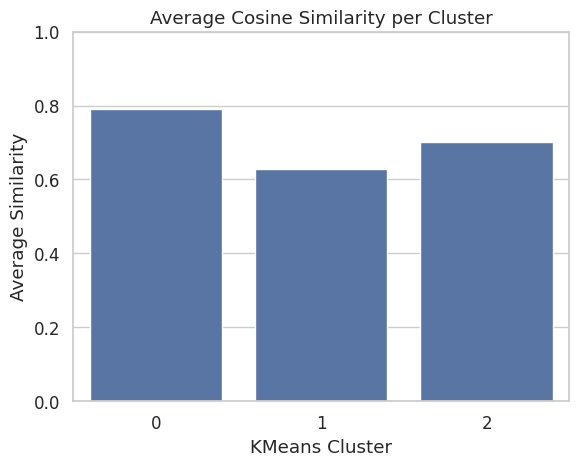

In [56]:
df_all["KMeans_Cluster"].value_counts()

from sklearn.metrics.pairwise import cosine_similarity

# Küme merkezlerini hesapla
cluster_centroids = {}
for cluster in df_all["KMeans_Cluster"].unique():
    idxs = df_all[df_all["KMeans_Cluster"] == cluster].index
    cluster_centroids[cluster] = np.mean([embeddings[i] for i in idxs], axis=0)

# Her abstract için kendi cluster merkezine cosine benzerlik hesapla
similarities = []
for i in range(len(df_all)):
    cluster = df_all.iloc[i]["KMeans_Cluster"]
    center = cluster_centroids[cluster]
    sim = cosine_similarity([embeddings[i]], [center])[0][0]
    similarities.append(sim)

df_all["Cluster_CosineSim"] = similarities
df_all.groupby("KMeans_Cluster")["Cluster_CosineSim"].mean()
import seaborn as sns
import matplotlib.pyplot as plt

cluster_means = df_all.groupby("KMeans_Cluster")["Cluster_CosineSim"].mean().reset_index()
sns.barplot(x="KMeans_Cluster", y="Cluster_CosineSim", data=cluster_means)
plt.title("Average Cosine Similarity per Cluster")
plt.xlabel("KMeans Cluster")
plt.ylabel("Average Similarity")
plt.ylim(0, 1)
plt.show()


We observed that clusters with higher sample sizes tend to show higher average semantic similarity between abstracts and their assigned centroids. Particularly, the epigenetic cluster (n=13) demonstrated a high average cosine similarity of 0.70, indicating strong internal consistency and model confidence. Conversely, the AI in oncology cluster, despite being semantically coherent, displayed more variance (mean similarity: 0.62), likely due to thematic heterogeneity

In [57]:
import gradio as gr
import pandas as pd
import numpy as np
import os
import csv
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df_all = pd.read_csv("makale_ozetleri_tumlesik.csv")
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df_all["Abstract"].tolist())

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_all["KMeans_Cluster"] = kmeans.fit_predict(embeddings)

# Logistic Regression classification
X = embeddings
y = df_all["KMeans_Cluster"]
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

# Cluster centroids
cluster_centroids = {}
for cluster_id in df_all["KMeans_Cluster"].unique():
    idxs = df_all[df_all["KMeans_Cluster"] == cluster_id].index
    cluster_centroids[cluster_id] = np.mean([embeddings[i] for i in idxs], axis=0)

# Descriptions
cluster_descriptions = {
    0: "🧪 Mixed content (possibly heterogeneous or outlier abstracts).",
    1: "🤖 AI in oncology: Deep learning, clinical decision support, and model-based predictions.",
    2: "🧬 Epigenetic regulation: DNA methylation, histone modification, chromatin remodeling."
}

def analyze_abstract(input_abstract):
    input_vec = model.encode([input_abstract])[0]
    sims = cosine_similarity([input_vec], embeddings)[0]
    top_indices = np.argsort(sims)[::-1][:3]
    top_matches = [(round(float(sims[i]), 3), df_all.iloc[i]["Title"]) for i in top_indices]

    assigned_cluster = clf.predict([input_vec])[0]
    centroid_vec = cluster_centroids[assigned_cluster]
    cluster_sim = float(cosine_similarity([input_vec], [centroid_vec])[0][0])

    description = cluster_descriptions.get(assigned_cluster, "Unknown cluster")
    low_conf_msg = "⚠️ Low confidence in cluster assignment. Manual review recommended." if cluster_sim < 0.55 else ""

    return (
        str(assigned_cluster),
        round(cluster_sim, 3),
        description,
        [[sim, title] for sim, title in top_matches],
        low_conf_msg
    )

def log_feedback(input_text, predicted_cluster, user_feedback, correct_cluster):
    file_exists = os.path.isfile("user_feedback.csv")
    with open("user_feedback.csv", "a", newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Abstract", "Predicted Cluster", "User Feedback", "Correct Cluster"])
        writer.writerow([input_text, predicted_cluster, user_feedback, correct_cluster])
    return "✅ Feedback saved!"

def pipeline(input_text, feedback=None, correct_cluster=None):
    if not input_text.strip():
        return "Error", 0.0, "No input", [], "Please enter text"
    result = analyze_abstract(input_text)
    if feedback in ["Yes", "No"]:
        log_feedback(input_text, result[0], feedback, correct_cluster)
    return result

with gr.Blocks() as demo:
    gr.Markdown("## 🧬 Scientific Abstract Analyzer + Feedback System")

    input_text = gr.Textbox(label="Paste your abstract here:", lines=4)
    submit_btn = gr.Button("Analyze")

    with gr.Row():
        cluster_id = gr.Textbox(label="Predicted Cluster")
        similarity = gr.Textbox(label="Similarity to Cluster Centroid")

    description = gr.Textbox(label="Cluster Description", interactive=False)
    warning = gr.Textbox(label="⚠️ Warning", interactive=False)

    similar_articles = gr.Dataframe(
        label="Top Similar Articles",
        headers=["Cosine Similarity", "Title"],
        datatype=["number", "str"],
        interactive=False
    )

    gr.Markdown("### 💬 Feedback")
    feedback_choice = gr.Radio(choices=["Yes", "No"], label="Was this correct?")
    correct_cluster_input = gr.Textbox(label="If not, what should be the correct cluster?")

    submit_feedback_btn = gr.Button("Submit Feedback")

    submit_btn.click(
        fn=pipeline,
        inputs=[input_text],
        outputs=[cluster_id, similarity, description, similar_articles, warning]
    )

    submit_feedback_btn.click(
        fn=pipeline,
        inputs=[input_text, feedback_choice, correct_cluster_input],
        outputs=[cluster_id, similarity, description, similar_articles, warning]
    )

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://baa2f99399250f4eee.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
